In [5]:
import pyrealsense2 as rs
import numpy as np
import cv2
import PIL.Image
from io import BytesIO
import IPython.display
import time

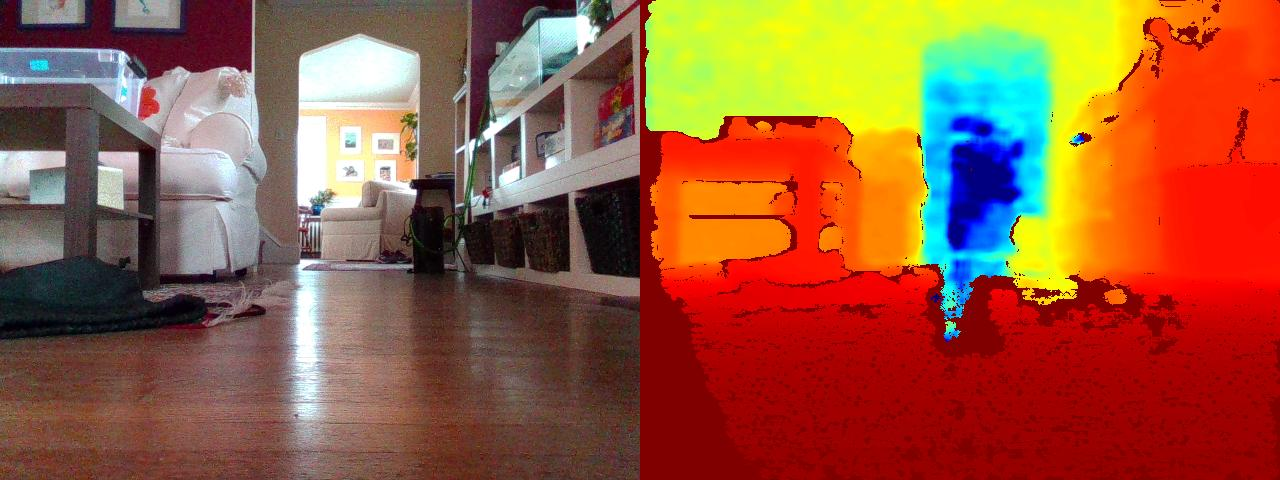

In [8]:
# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

display = IPython.display.display('', display_id=1)

# Start streaming
pipeline.start(config)

try:
    for i in range(50):    
        # Wait for a coherent pair of frames: depth and color
        frames = pipeline.wait_for_frames()
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        if not depth_frame or not color_frame:
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())
       
        color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
        # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
       
        # Stack both images horizontally
        images = np.hstack((color_image, depth_colormap))
       
        f = BytesIO()
        PIL.Image.fromarray(images).save(f, 'jpeg')
        img = IPython.display.Image(data=f.getvalue())
        display.update(img)
        time.sleep(0.20)
finally:
    pipeline.stop()